 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"></ul></div>

In [1]:
power_metric <- function(tpr, fpr) {
    tpr / (tpr + fpr)
}

precision <- function(tpr, fpr, a) {
    tpr / (tpr + (1/a - 1) * fpr)
}

In [2]:
get_model_performance <- function(quality, N, a) {
    tpr <- seq(0, 1, 0.01)
    fpr <- exp(quality * tpr)
    fpr = (fpr-min(fpr))/(max(fpr)-min(fpr))

    p <- a * N
    n <- (1 - a) * N
    prec <- precision(tpr, fpr, a)
    prec <- prec[2:length(prec)]
    pm <- power_metric(tpr, fpr)
    pm <- pm[2:length(pm)]
    tpr_vs_fpr <- fpr
    tpr_vs_fpr <- tpr_vs_fpr[2:length(tpr_vs_fpr)]
#     tpr_vs_fpr <- (tpr_vs_fpr-min(tpr_vs_fpr))/(max(tpr_vs_fpr)-min(tpr_vs_fpr))
    
    return(list(
        fpr=fpr
        , tpr=tpr
        , tpr_vs_fpr=tpr_vs_fpr
        , pm=pm
        , prec=prec
    ))
}

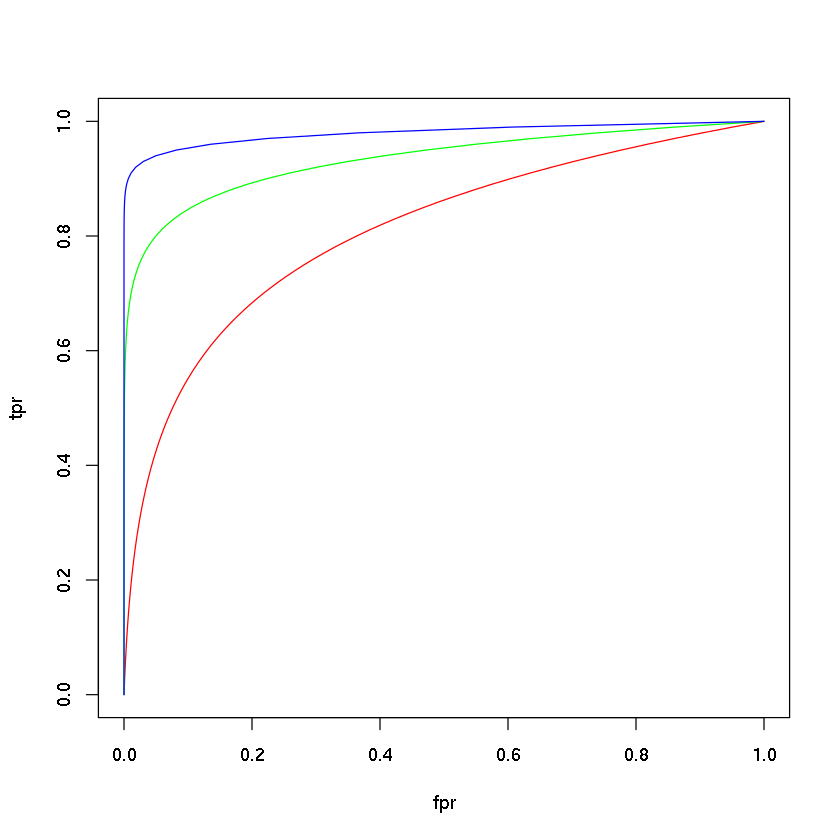

In [3]:
a <- 0.01
N <- 10000
bad_model <- get_model_performance(5, N, a)
good_model <- get_model_performance(15, N, a)
excellent_model <- get_model_performance(50, N, a)

plot(bad_model$fpr, bad_model$tpr, xlab = "fpr", ylab = "tpr", col = "red", type = "l")
lines(good_model$fpr, good_model$tpr, col = "green")
lines(excellent_model$fpr, excellent_model$tpr, col = "blue")

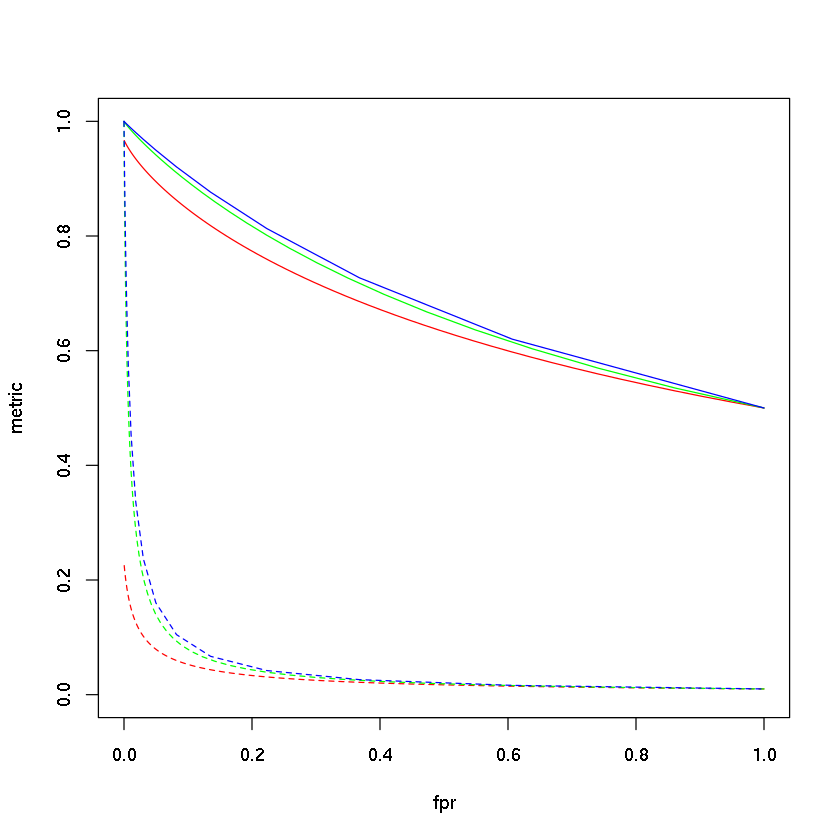

In [4]:
plot(
        1
        , type="n"
        , xlab = "fpr"
        , ylab = "metric"
        , xlim=c(0, 1)
        , ylim=c(0, 1)
)
lines(bad_model$tpr_vs_fpr, bad_model$pm, col = "red")
lines(bad_model$tpr_vs_fpr, bad_model$prec, col = "red", lty=2)
lines(good_model$tpr_vs_fpr, good_model$pm, col = "green")
lines(good_model$tpr_vs_fpr, good_model$prec, col = "green", lty=2)
lines(excellent_model$tpr_vs_fpr, excellent_model$pm, col = "blue")
lines(excellent_model$tpr_vs_fpr, excellent_model$prec, col = "blue", lty=2)